### Dataset

> https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales?select=SuperMarket+Analysis.csv

- **Invoice ID**: Unique identifier for each transaction.
- **Branch**: The branch location of the supermarket (e.g., Yangon, Naypyitaw, Mandalay).
- **City**: The city in which the supermarket branch is located.
- **Customer Type**: Indicates whether the customer is a 'Member' or 'Normal'.
- **Gender**: Gender of the customer.
- **Product Line**: The category of the product sold (e.g., Health & Beauty, Electronic Accessories, Home & Lifestyle).
- **Unit Price**: Price per unit of the product.
- **Quantity**: Number of items purchased.
- **Tax 5%**: Calculated tax amount on the transaction at a 5% rate.
- **Sales**: Total amount for the transaction including tax.
- **Date**: Date of the transaction.
- **Time**: Time of the transaction.
- **Payment**: Payment method used (e.g., Cash, Ewallet, Credit card).
- **COGS**: Cost of goods sold, representing the raw cost of the products.
- **Gross Margin Percentage**: Fixed percentage of profit for each sale (4.7619%).
- **Gross Income**: Profit earned from the transaction.
- **Rating**: Customer satisfaction rating (out of 10).

### Mendefinisikan Pertanyaan

1) **Target Analisis:**
> Menganalisis pola penjualan, perilaku pelanggan, dan kinerja produk pada supermarket untuk mengetahui faktor-faktor yang memengaruhi pendapatan, profit, dan kepuasan pelanggan, serta memberikan insight bisnis yang dapat digunakan untuk pengambilan keputusan.

2) **Pertanyaan:**
> - Cabang atau kota mana yang memiliki total penjualan dan profit tertinggi?
> - Product Line apa yang paling berkontribusi terhadap pendapatan dan keuntungan?
> - Apakah terdapat perbedaan pola pembelian antara pelanggan Member dan Normal?
> - Bagaimana pengaruh metode pembayaran terhadap nilai transaksi dan jumlah transaksi?
> - Kapan waktu penjualan paling tinggi terjadi (berdasarkan tanggal, bulan, dan jam)?
> - Apakah Gender pelanggan memengaruhi jenis produk yang dibeli dan total belanja?
> - Product Line mana yang memiliki tingkat kepuasan pelanggan tertinggi dan terendah?
> - Apakah terdapat hubungan antara jumlah pembelian (Quantity) dan total pendapatan?
> - Apakah nilai transaksi yang lebih tinggi cenderung menghasilkan rating pelanggan yang lebih baik?
> - Faktor apa yang paling berpengaruh terhadap Gross Income (harga, kuantitas, atau jenis produk)?

### Data Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import chardet
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset\SuperMarket Analysis.csv
./dataset\supermarket_sales.csv


In [2]:
with open('./dataset/SuperMarket Analysis.csv', 'rb') as f:
    print(chardet.detect(f.read()))

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


In [3]:
df = pd.read_csv('./dataset/SuperMarket Analysis.csv')

In [4]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


### Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

> Perbaiki format date

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Sales,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,Alex,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,565
Gender,1000,2,Female,571
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,7:48:00 PM,7
Payment,1000,3,Ewallet,345


In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [11]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], errors='coerce')
df['Datetime']

0     2019-01-05 13:08:00
1     2019-03-08 10:29:00
2     2019-03-03 13:23:00
3     2019-01-27 20:33:00
4     2019-02-08 10:37:00
              ...        
995   2019-01-29 13:46:00
996   2019-03-02 17:16:00
997   2019-02-09 13:22:00
998   2019-02-22 15:33:00
999   2019-02-18 13:28:00
Name: Datetime, Length: 1000, dtype: datetime64[ns]

### EDA

#### Cabang atau kota mana yang memiliki total penjualan dan profit tertinggi?

In [12]:
df[['Branch', 'City']].describe()

,Branch,City
count,1000,1000
unique,3,3
top,Alex,Yangon
freq,340,340


In [13]:
df[['Sales', 'gross income']].describe()

,Sales,gross income
count,1000.000000,1000.000000
mean,322.966749,15.379369
std,245.885335,11.708825
min,10.678500,0.508500
25%,124.422375,5.924875
50%,253.848000,12.088000
75%,471.350250,22.445250
max,1042.650000,49.650000


Distribusi Sales dan gross income

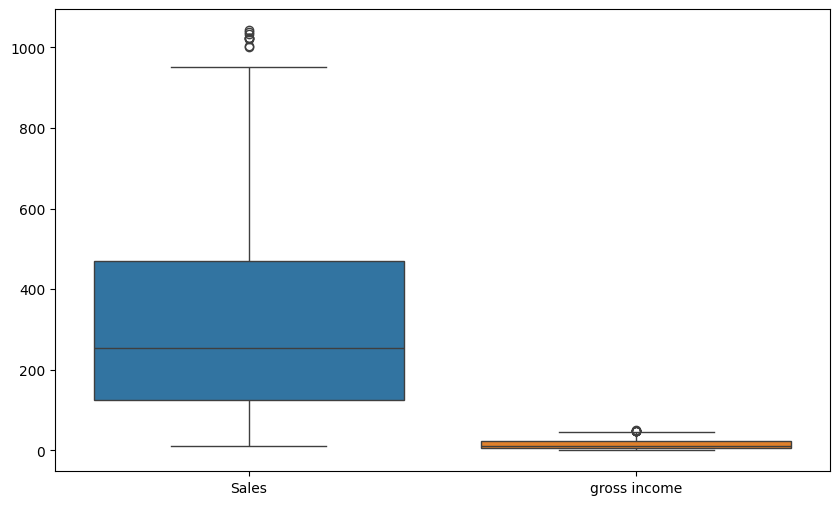

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(df[['Sales', 'gross income']])
plt.show()

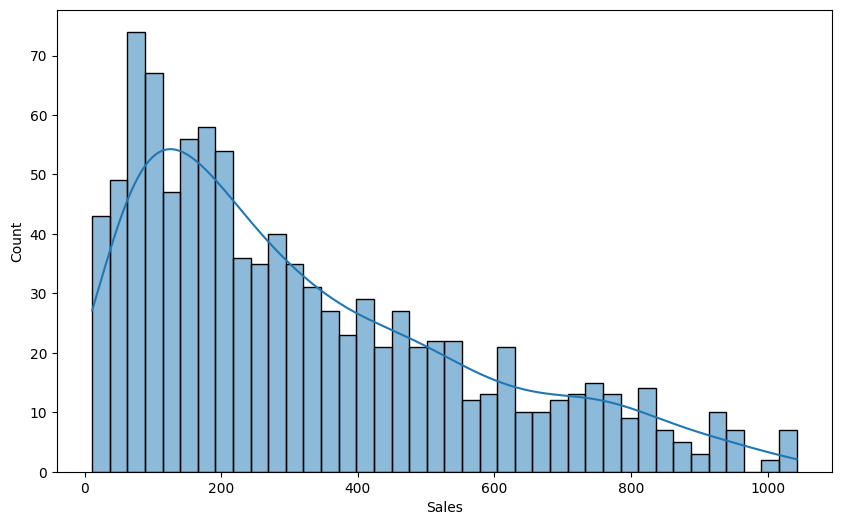

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Sales', kde=True, bins=40)
plt.show()

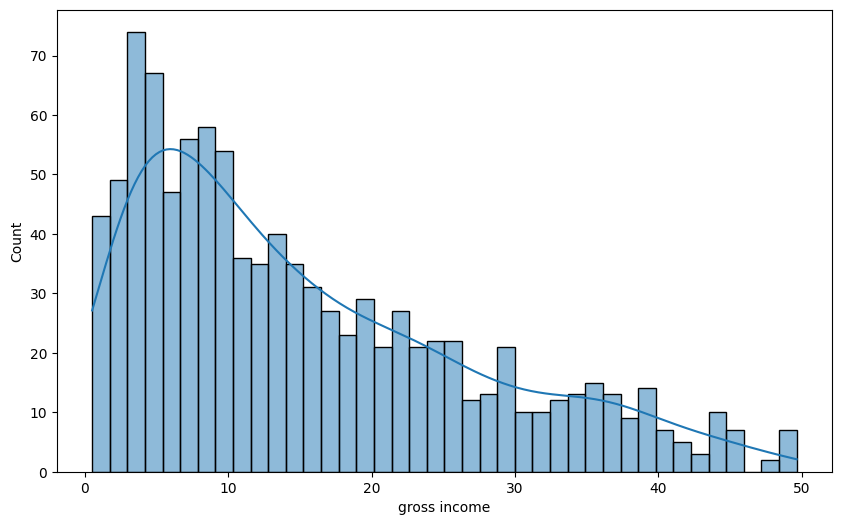

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='gross income', kde=True, bins=40)
plt.show()

Branch

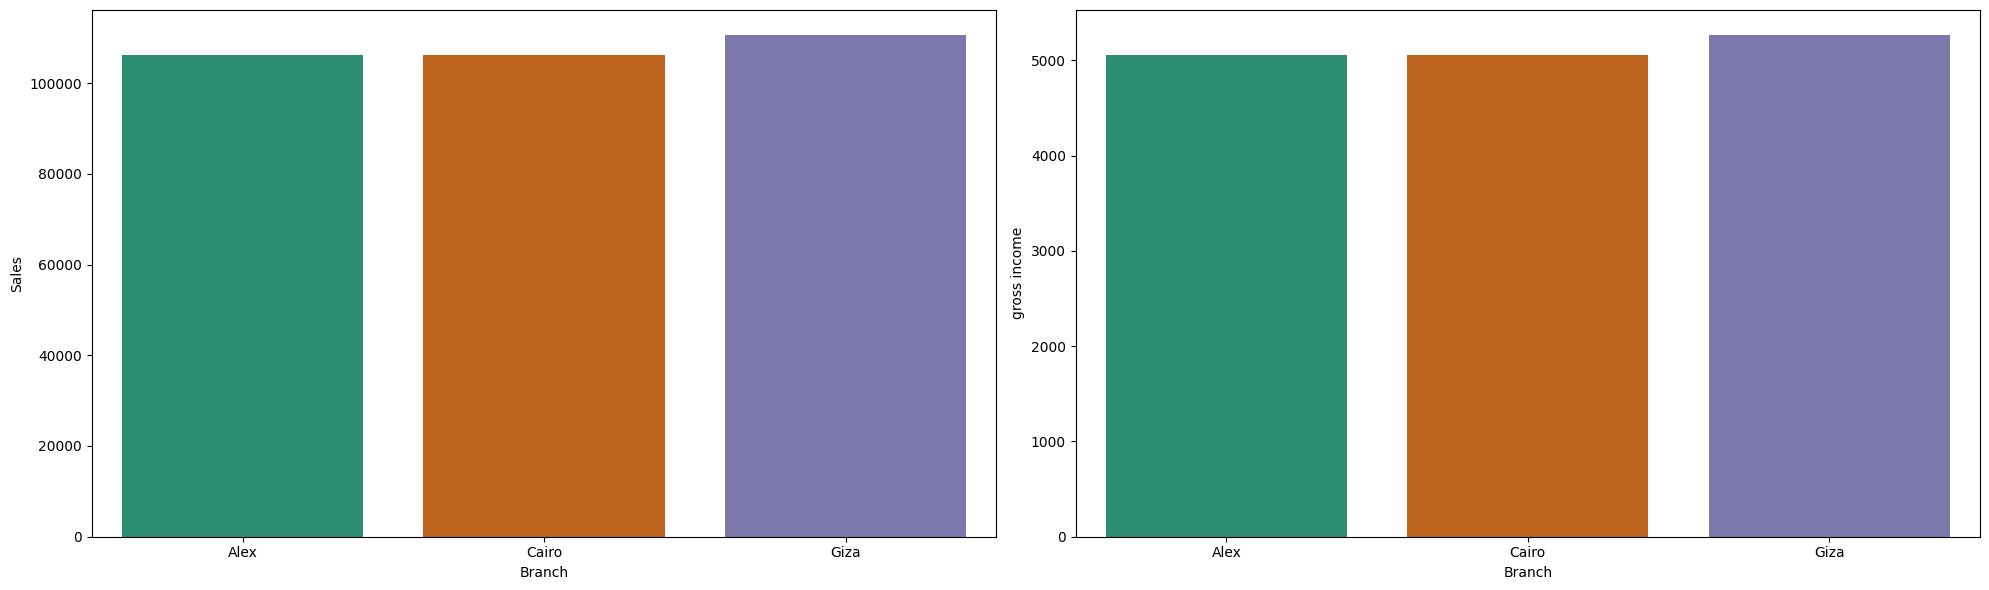

In [17]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
total_by_branch = df.groupby('Branch')['Sales'].sum().reset_index()
sns.barplot(data=total_by_branch, x='Branch', y='Sales', palette='Dark2')

plt.subplot(1, 2, 2)
profit_by_branch = df.groupby('Branch')['gross income'].sum().reset_index()
sns.barplot(data=profit_by_branch, x='Branch', y='gross income', palette='Dark2')

plt.tight_layout()
plt.show()

In [18]:
df.groupby('Branch')['Sales'].sum().reset_index()

,Branch,Sales
0,Alex,106200.3705
1,Cairo,106197.6720
2,Giza,110568.7065


In [19]:
df.groupby('Branch')['gross income'].sum().reset_index()

,Branch,gross income
0,Alex,5057.1605
1,Cairo,5057.0320
2,Giza,5265.1765


City

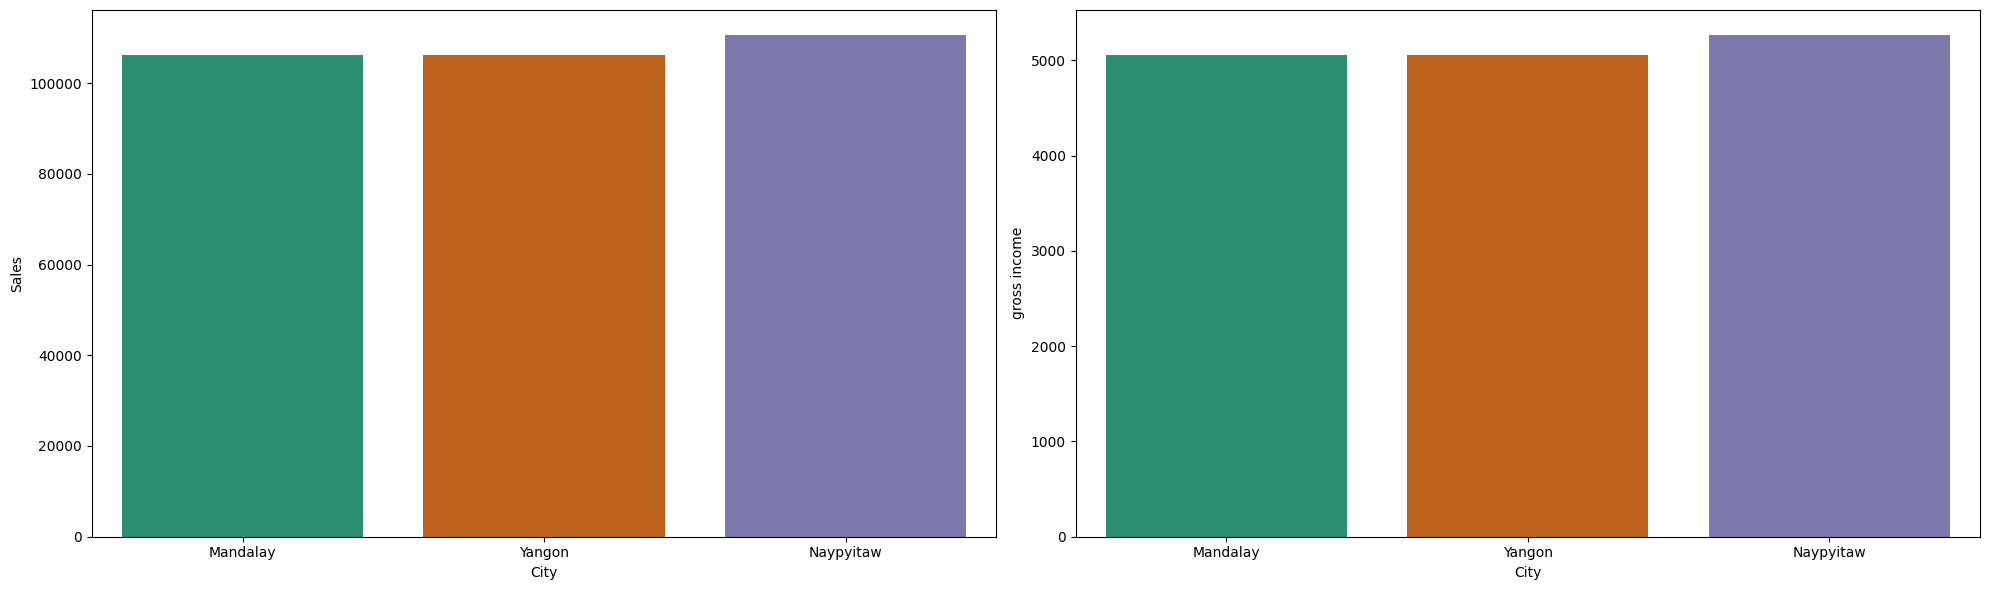

In [20]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
total_by_city = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales')
sns.barplot(data=total_by_city, x='City', y='Sales', palette='Dark2')

plt.subplot(1, 2, 2)
profit_by_city = df.groupby('City')['gross income'].sum().reset_index().sort_values(by='gross income')
sns.barplot(data=profit_by_city, x='City', y='gross income', palette='Dark2')

plt.tight_layout()
plt.show()

In [21]:
df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales')

,City,Sales
0,Mandalay,106197.6720
2,Yangon,106200.3705
1,Naypyitaw,110568.7065


In [22]:
df.groupby('City')['gross income'].sum().reset_index().sort_values(by='gross income')

,City,gross income
0,Mandalay,5057.0320
2,Yangon,5057.1605
1,Naypyitaw,5265.1765


**Insight:**
> Cabang Giza (kota Naypyitaw) memiliki kinerja terbaik, ditunjukkan oleh total penjualan dan gross income tertinggi dibandingkan cabang/kota lain, yang mengindikasikan bahwa lokasi cabang berpengaruh signifikan terhadap performa penjualan dan profit, dengan potensi pasar paling kuat berada di Naypyitaw.

#### Product Line apa yang paling berkontribusi terhadap pendapatan dan keuntungan?

In [23]:
df['Product line'].describe()

count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object

In [24]:
df['Sales'].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Sales, dtype: float64

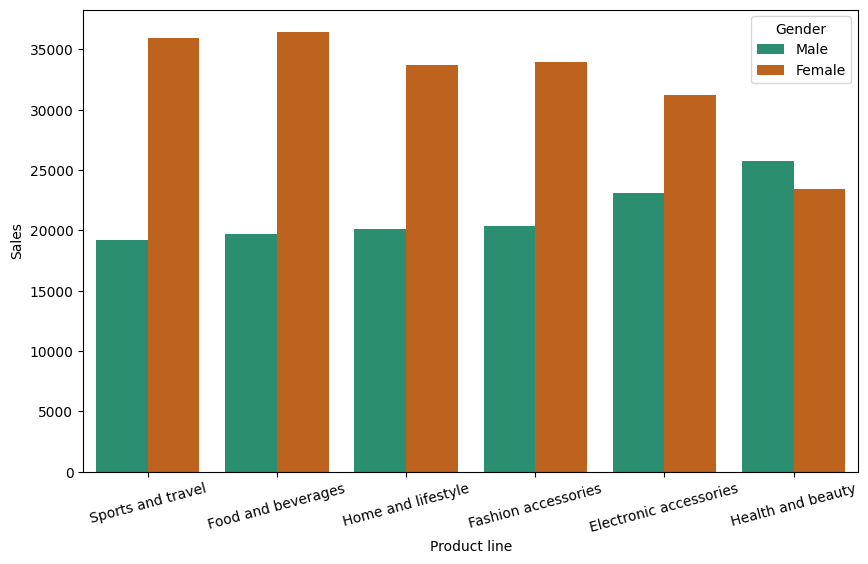

In [25]:
plt.figure(figsize=(10,6))
total_by_product = df.groupby(['Product line', 'Gender'])['Sales'].sum().reset_index().sort_values(by='Sales')
sns.barplot(data=total_by_product, x='Product line', y='Sales', palette='Dark2', hue='Gender')
plt.xticks(rotation=15)
plt.show()

In [26]:
df.groupby('Product line')['Sales'].sum().reset_index().sort_values(ascending=False, by='Sales')

,Product line,Sales
2,Food and beverages,56144.8440
5,Sports and travel,55122.8265
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
3,Health and beauty,49193.7390


In [27]:
df.groupby(['Product line', 'Gender'])['Sales'].sum().reset_index().sort_values(ascending=False, by='Sales')

,Product line,Gender,Sales
4,Food and beverages,Female,36465.7965
10,Sports and travel,Female,35920.3845
2,Fashion accessories,Female,33919.6410
8,Home and lifestyle,Female,33720.5820
0,Electronic accessories,Female,31226.7060
7,Health and beauty,Male,25775.0115
6,Health and beauty,Female,23418.7275
1,Electronic accessories,Male,23110.8255
3,Fashion accessories,Male,20386.2540
9,Home and lifestyle,Male,20141.3310


**Insight:**
> Product Line Food and Beverages merupakan kontributor terbesar terhadap pendapatan (dan otomatis keuntungan), diikuti oleh Sports and Travel, yang menunjukkan bahwa kategori kebutuhan konsumsi dan aktivitas memiliki permintaan paling tinggi. Selain itu, pelanggan perempuan mendominasi total penjualan di hampir seluruh product line, terutama pada Food and Beverages dan Sports and Travel, sementara Health and Beauty menjadi satu-satunya kategori di mana kontribusi penjualan pria sedikit lebih tinggi, menandakan perbedaan preferensi produk berdasarkan gender.

#### Apakah terdapat perbedaan pola pembelian antara pelanggan Member dan Normal?

In [28]:
df['Customer type'].describe()

count       1000
unique         2
top       Member
freq         565
Name: Customer type, dtype: object

In [29]:
df[['Sales', 'Quantity', 'Rating']].describe()

,Sales,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,322.966749,5.510000,6.97270
std,245.885335,2.923431,1.71858
min,10.678500,1.000000,4.00000
25%,124.422375,3.000000,5.50000
50%,253.848000,5.000000,7.00000
75%,471.350250,8.000000,8.50000
max,1042.650000,10.000000,10.00000


Customer type vs. Sales

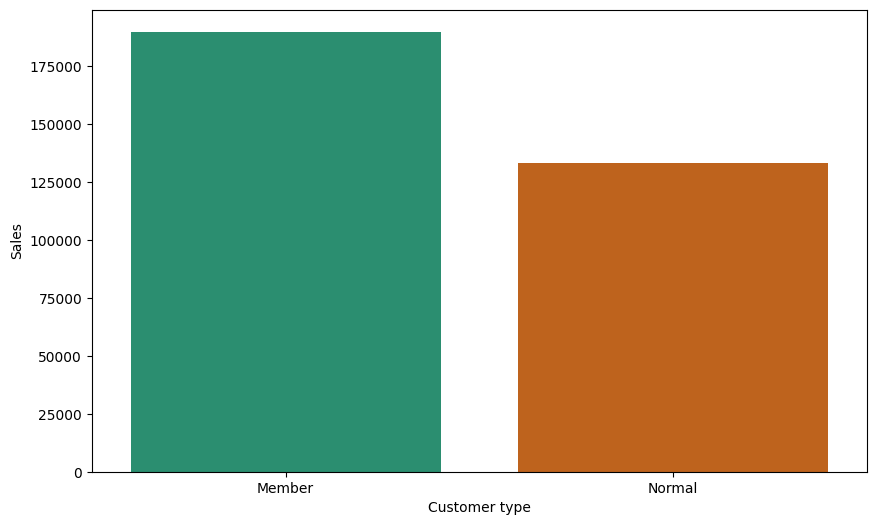

In [30]:
plt.figure(figsize=(10,6))
total_by_cust = df.groupby('Customer type')['Sales'].sum().reset_index()
sns.barplot(data=total_by_cust, x='Customer type', y='Sales', palette='Dark2')
plt.show()

In [31]:
df.groupby('Customer type')['Sales'].sum().reset_index()

,Customer type,Sales
0,Member,189694.764
1,Normal,133271.985


Customer type vs. Quantity

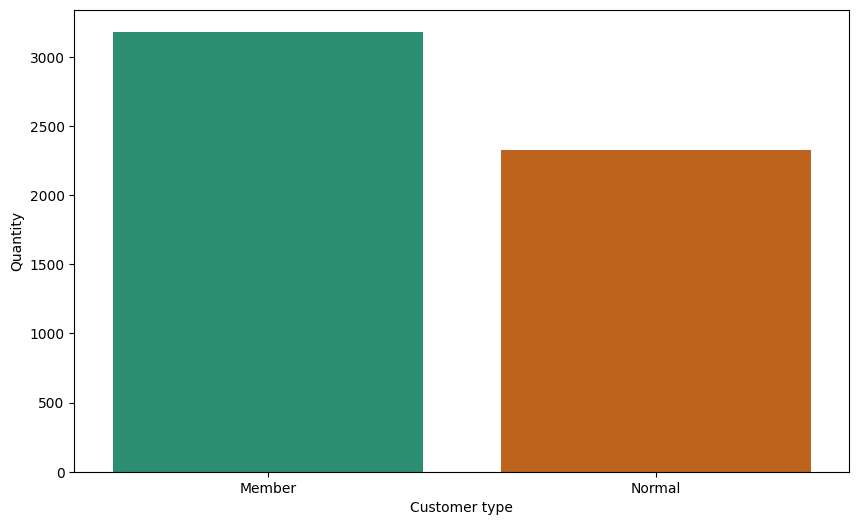

In [32]:
plt.figure(figsize=(10,6))
quant_by_cust = df.groupby('Customer type')['Quantity'].sum().reset_index()
sns.barplot(data=quant_by_cust, x='Customer type', y='Quantity', palette='Dark2')
plt.show()

In [33]:
df.groupby('Customer type')['Quantity'].sum().reset_index()

,Customer type,Quantity
0,Member,3181
1,Normal,2329


Customer type vs. Rating

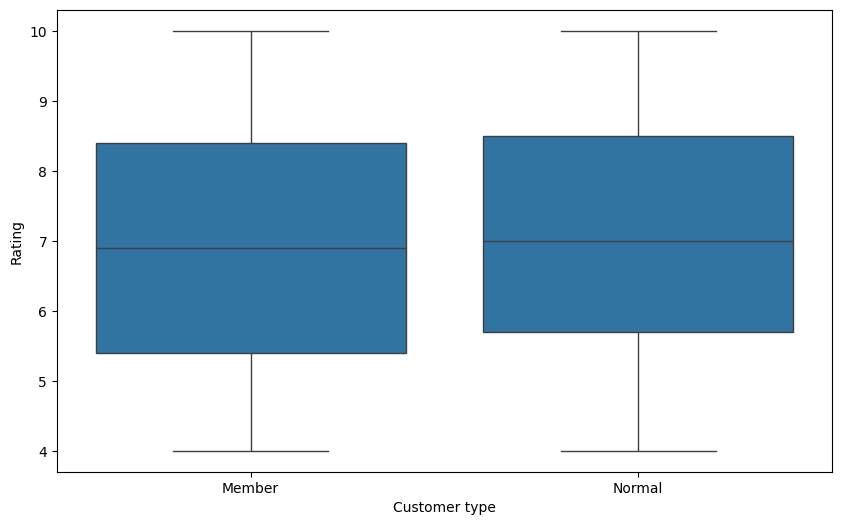

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Customer type', y='Rating')
plt.show()

In [35]:
rating_summary = df.groupby('Customer type')['Rating'].agg(['std', 'mean', 'median', 'min', 'max']).reset_index()
rating_summary

,Customer type,std,mean,median,min,max
0,Member,1.743877,6.917168,6.9,4.0,10.0
1,Normal,1.684420,7.044828,7.0,4.0,10.0


**Insight:**
> Pelanggan Member menunjukkan pola pembelian yang lebih kuat dibandingkan pelanggan Normal, ditandai dengan total penjualan dan jumlah pembelian (quantity) yang lebih tinggi, yang mengindikasikan bahwa Member berkontribusi lebih besar terhadap pendapatan supermarket. Namun, dari sisi kepuasan pelanggan (rating), perbedaan antara Member dan Normal relatif kecil, dengan median rating yang hampir sama dan distribusi rating yang mirip, sehingga keanggotaan lebih berpengaruh pada intensitas dan nilai pembelian daripada pada tingkat kepuasan pelanggan.

#### Bagaimana pengaruh metode pembayaran terhadap nilai transaksi dan jumlah transaksi?

In [36]:
df['Payment'].describe()

count        1000
unique          3
top       Ewallet
freq          345
Name: Payment, dtype: object

In [37]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [38]:
df[['Sales', 'Quantity']].describe()

,Sales,Quantity
count,1000.000000,1000.000000
mean,322.966749,5.510000
std,245.885335,2.923431
min,10.678500,1.000000
25%,124.422375,3.000000
50%,253.848000,5.000000
75%,471.350250,8.000000
max,1042.650000,10.000000


Nilai Transaksi

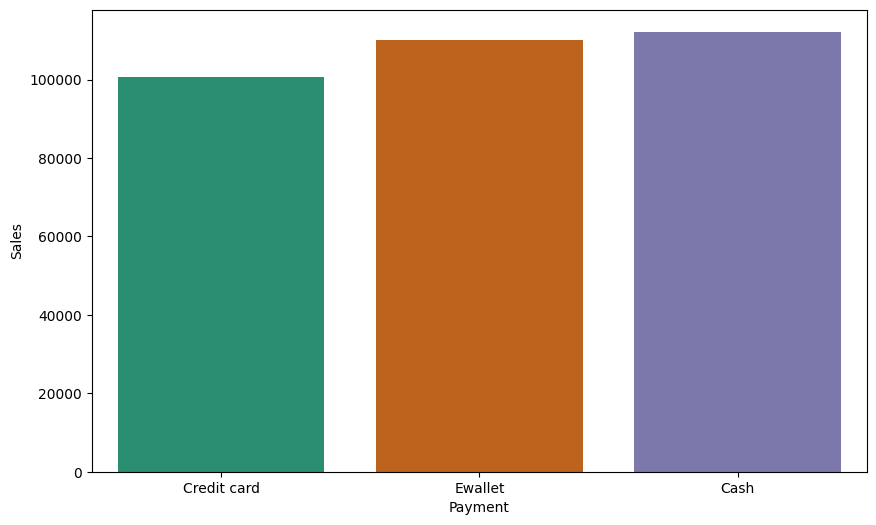

In [39]:
plt.figure(figsize=(10,6))
total_by_pay = df.groupby('Payment')['Sales'].sum().reset_index().sort_values(by='Sales')
sns.barplot(data=total_by_pay, x='Payment', y='Sales', palette='Dark2')
plt.show()

In [40]:
df.groupby('Payment')['Sales'].sum().reset_index().sort_values(by='Sales')

,Payment,Sales
1,Credit card,100767.072
2,Ewallet,109993.107
0,Cash,112206.570


In [41]:
df.groupby('Payment')['Sales'].mean().reset_index().sort_values(by='Sales')

,Payment,Sales
2,Ewallet,318.820600
1,Credit card,324.009878
0,Cash,326.181890


Jumlah Transaksi

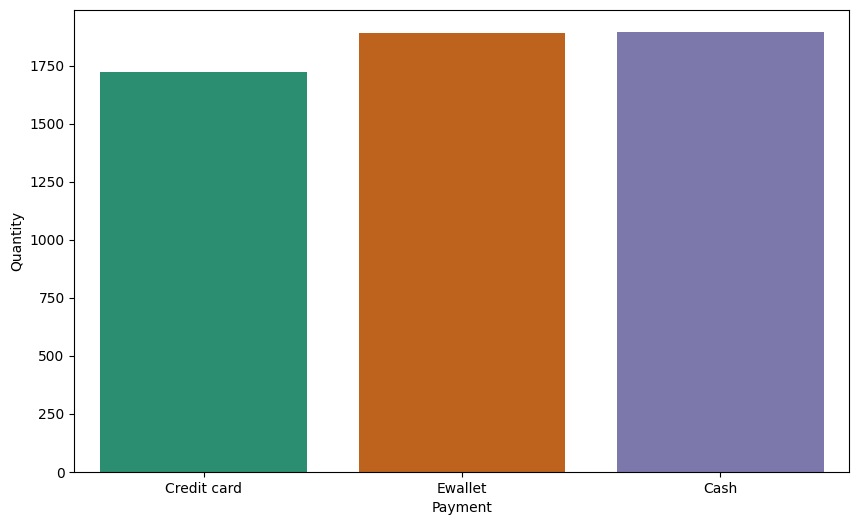

In [42]:
plt.figure(figsize=(10,6))
quant_by_pay = df.groupby('Payment')['Quantity'].sum().reset_index().sort_values(by='Quantity')
sns.barplot(data=quant_by_pay, x='Payment', y='Quantity', palette='Dark2')
plt.show()

In [43]:
df.groupby('Payment')['Quantity'].sum().reset_index().sort_values(by='Quantity')

,Payment,Quantity
1,Credit card,1722
2,Ewallet,1892
0,Cash,1896


**Insight:**
> Metode pembayaran Cash menunjukkan performa paling dominan, ditandai dengan total penjualan tertinggi, jumlah transaksi terbanyak, serta rata-rata nilai transaksi paling besar dibandingkan metode lainnya. Ewallet berada di posisi kedua dengan jumlah transaksi yang hampir setara dengan Cash, namun rata-rata nilai transaksi lebih rendah, yang mengindikasikan bahwa Ewallet cenderung digunakan untuk pembelian yang lebih sering tetapi bernilai sedang. Sementara itu, Credit Card memiliki jumlah transaksi terendah, meskipun nilai transaksi rata-ratanya relatif tinggi, menunjukkan bahwa metode ini lebih sering digunakan untuk transaksi tertentu atau bernilai lebih besar, bukan untuk pembelian harian.

#### Kapan waktu penjualan paling tinggi terjadi (berdasarkan tanggal, bulan, dan jam)?

In [44]:
df['Datetime']

0     2019-01-05 13:08:00
1     2019-03-08 10:29:00
2     2019-03-03 13:23:00
3     2019-01-27 20:33:00
4     2019-02-08 10:37:00
              ...        
995   2019-01-29 13:46:00
996   2019-03-02 17:16:00
997   2019-02-09 13:22:00
998   2019-02-22 15:33:00
999   2019-02-18 13:28:00
Name: Datetime, Length: 1000, dtype: datetime64[ns]

In [45]:
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.day_name()
df['Month'] = df['Datetime'].dt.month
df['Month_name'] = df['Datetime'].dt.month_name()

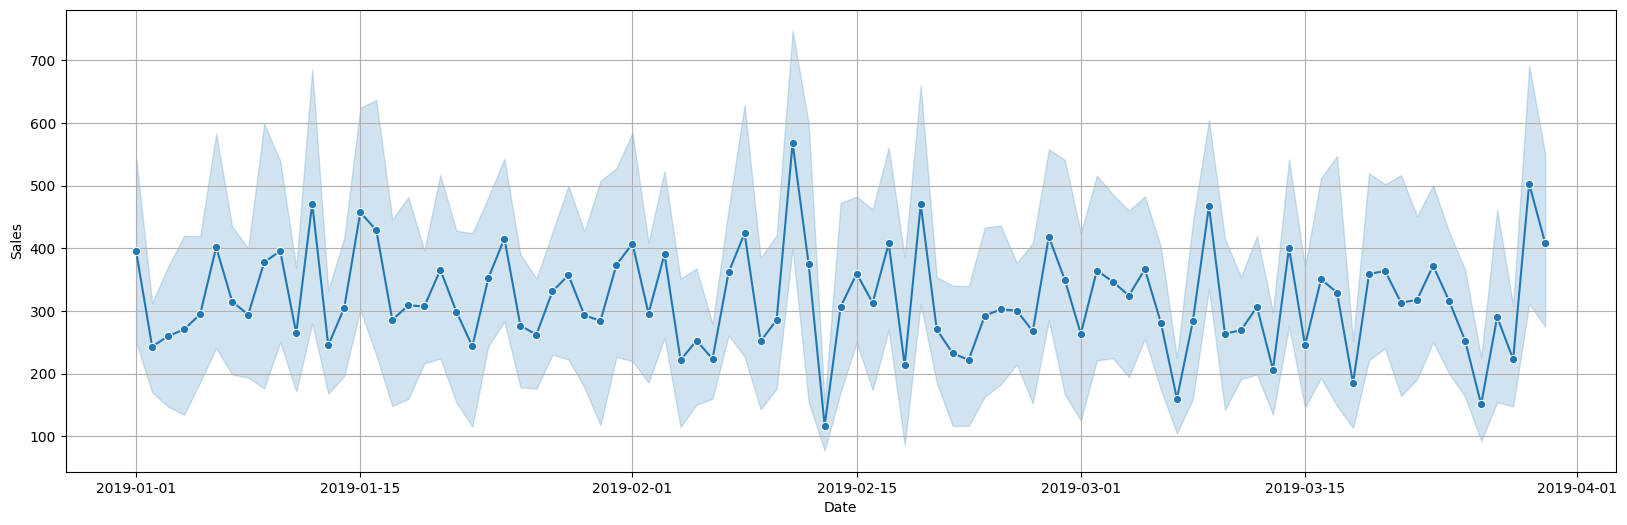

In [46]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df, x='Date', y='Sales', marker='o')
plt.grid()
plt.show()

In [47]:
df.groupby('Date')['Sales'].mean().sort_values(ascending=False)

Date
2019-02-11    567.769125
2019-03-29    502.905375
2019-01-12    471.342136
2019-02-19    469.791000
2019-03-09    467.127938
                 ...    
2019-03-13    206.360700
2019-03-18    184.690500
2019-03-07    159.806500
2019-03-26    150.962538
2019-02-13    116.779687
Name: Sales, Length: 89, dtype: float64

Hour

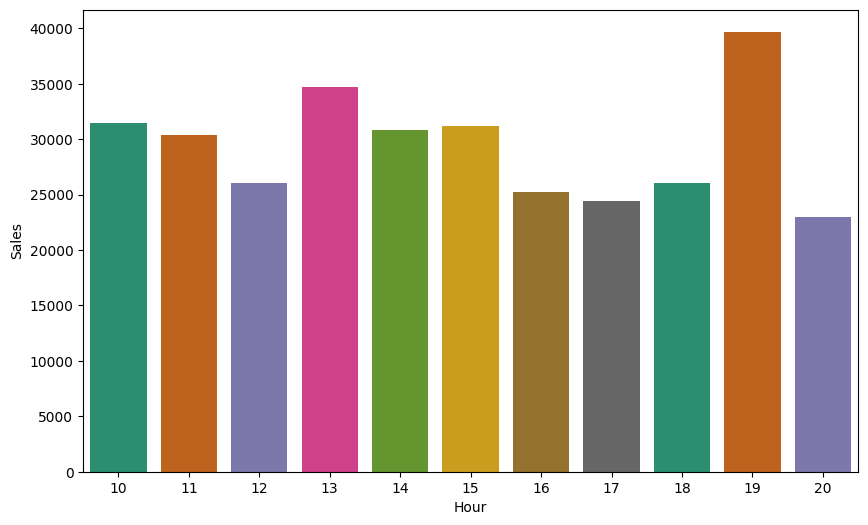

In [48]:
plt.figure(figsize=(10,6))
sales_hour = df.groupby('Hour')['Sales'].sum().reset_index()
sns.barplot(data=sales_hour, x='Hour', y='Sales', palette='Dark2')
plt.show()

In [49]:
df.groupby('Hour')['Sales'].sum().reset_index()

,Hour,Sales
0,10,31421.4810
1,11,30377.3295
2,12,26065.8825
3,13,34723.2270
4,14,30828.3990
5,15,31179.5085
6,16,25226.3235
7,17,24445.2180
8,18,26030.3400
9,19,39699.5130


In [50]:
df.groupby('Hour')['Sales'].mean().reset_index()

,Hour,Sales
0,10,311.103772
1,11,337.525883
2,12,292.875084
3,13,337.118709
4,14,371.426494
5,15,305.681456
6,16,327.614591
7,17,330.340784
8,18,279.896129
9,19,351.323124


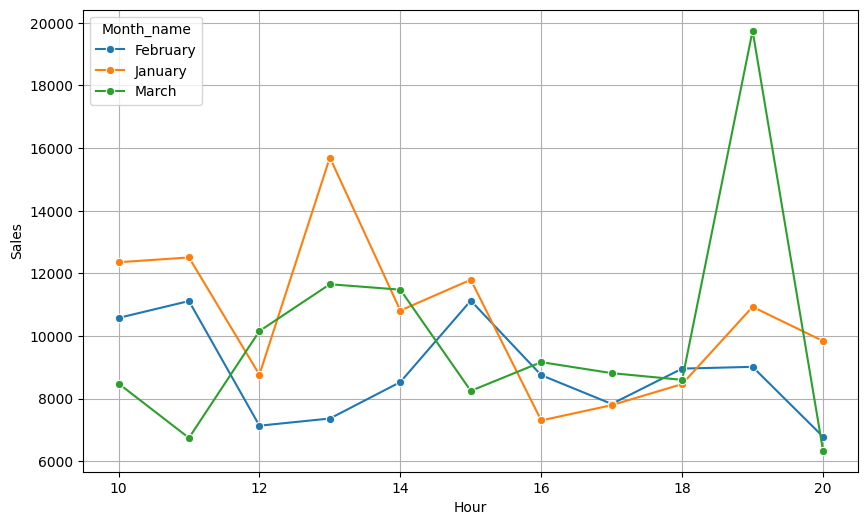

In [51]:
plt.figure(figsize=(10,6))
monthly_bar = df.groupby(['Month_name', 'Hour'])['Sales'].sum().reset_index()
sns.lineplot(data=monthly_bar, x='Hour', y='Sales', hue='Month_name', marker='o')
plt.grid()
plt.show()

In [52]:
df.groupby(['Month_name', 'Hour'])['Sales'].sum().reset_index()

,Month_name,Hour,Sales
0,February,10,10579.0335
1,February,11,11118.6600
2,February,12,7138.8345
3,February,13,7367.8080
4,February,14,8531.1450
5,February,15,11131.0080
6,February,16,8752.0545
7,February,17,7833.8400
8,February,18,8961.0780
9,February,19,9018.1245


Weekday

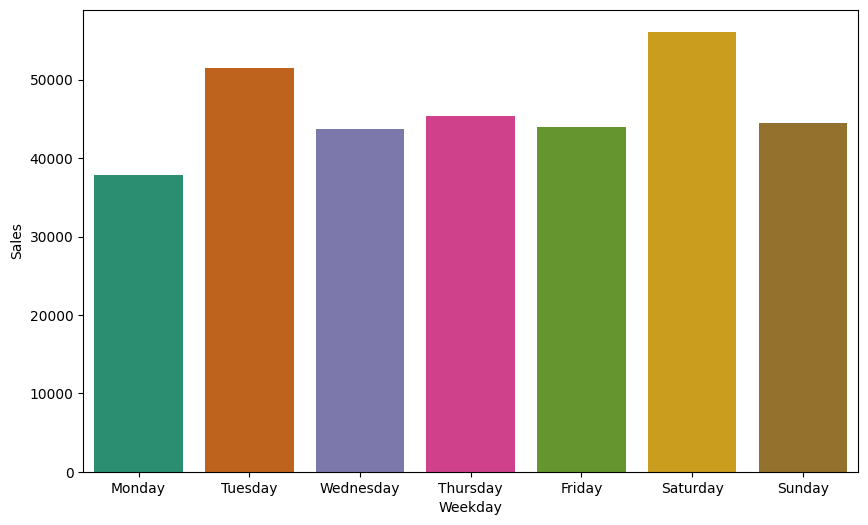

In [53]:
plt.figure(figsize=(10,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_monthname = df.groupby('Weekday')['Sales'].sum().reindex(order).reset_index()
sns.barplot(data=sales_monthname, x='Weekday', y='Sales', palette='Dark2')
plt.show()

In [54]:
df.groupby('Weekday')['Sales'].sum().reindex(order).reset_index()

,Weekday,Sales
0,Monday,37899.0780
1,Tuesday,51482.2455
2,Wednesday,43731.1350
3,Thursday,45349.2480
4,Friday,43926.3405
5,Saturday,56120.8095
6,Sunday,44457.8925


In [55]:
df.groupby('Weekday')['Sales'].mean().reindex(order).reset_index()

,Weekday,Sales
0,Monday,303.192624
1,Tuesday,325.836997
2,Wednesday,305.812133
3,Thursday,328.617739
4,Friday,316.016838
5,Saturday,342.200058
6,Sunday,334.269868


Month

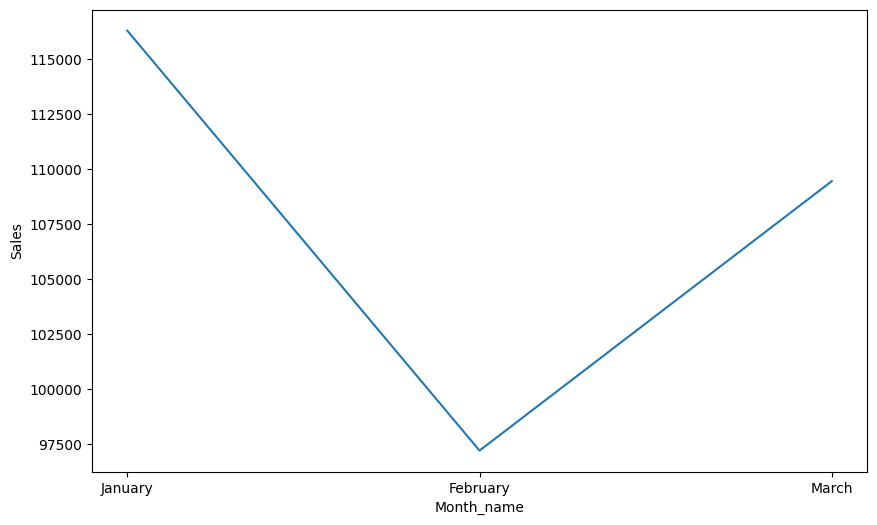

In [56]:
plt.figure(figsize=(10,6))
order = ['January', 'February', 'March']
monthly = df.groupby('Month_name')['Sales'].sum().reindex(order).reset_index()
sns.lineplot(data=monthly, x='Month_name', y='Sales')
plt.show()

In [57]:
df.groupby('Month_name')['Sales'].sum().reindex(order).reset_index()

,Month_name,Sales
0,January,116291.868
1,February,97219.374
2,March,109455.507


**Insight:**
> Penjualan tertinggi terjadi pada pertengahan hingga akhir periode observasi, dengan puncak harian terjadi pada tanggal 11 Februari 2019, yang memiliki rata-rata nilai penjualan tertinggi per transaksi. Secara bulanan, Januari merupakan bulan dengan total penjualan tertinggi, diikuti oleh Maret, sementara Februari mencatat penjualan terendah. Dari sisi jam operasional, pukul 19.00 merupakan waktu paling ramai, ditandai dengan total penjualan dan rata-rata penjualan per transaksi yang tinggi, menunjukkan bahwa pelanggan cenderung melakukan pembelian bernilai besar pada jam sore hingga malam hari, terutama di bulan Maret pada pukul 19.00 yang menjadi kombinasi waktu dengan penjualan tertinggi.

#### Apakah Gender pelanggan memengaruhi jenis produk yang dibeli dan total belanja?

In [58]:
df[['Gender', 'Product line']].describe()

,Gender,Product line
count,1000,1000
unique,2,6
top,Female,Fashion accessories
freq,571,178


In [59]:
df['Sales'].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Sales, dtype: float64

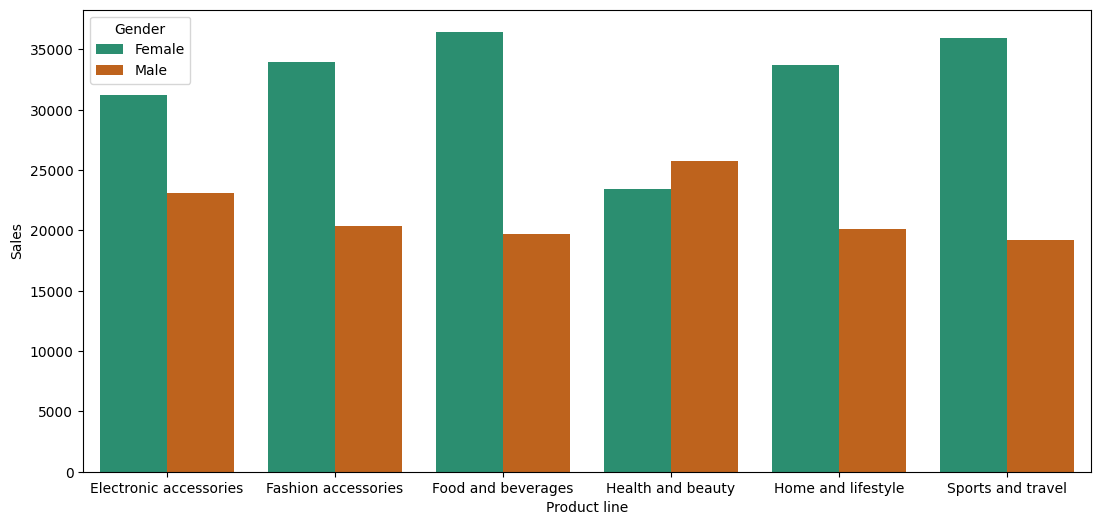

In [60]:
plt.figure(figsize=(13,6))
sales_gender = df.groupby(['Gender', 'Product line'])['Sales'].sum().reset_index()
sns.barplot(data=sales_gender, x='Product line', y='Sales', hue='Gender', palette='Dark2')
plt.show()

In [61]:
df.groupby(['Gender', 'Product line'])['Sales'].sum().reset_index()

,Gender,Product line,Sales
0,Female,Electronic accessories,31226.7060
1,Female,Fashion accessories,33919.6410
2,Female,Food and beverages,36465.7965
3,Female,Health and beauty,23418.7275
4,Female,Home and lifestyle,33720.5820
5,Female,Sports and travel,35920.3845
6,Male,Electronic accessories,23110.8255
7,Male,Fashion accessories,20386.2540
8,Male,Food and beverages,19679.0475
9,Male,Health and beauty,25775.0115


**Insight:**
> Gender pelanggan memengaruhi jenis produk yang dibeli dan total belanja. Pelanggan perempuan (Female) menunjukkan total belanja lebih tinggi di hampir semua product line, terutama pada Food and Beverages, Sports and Travel, serta Fashion Accessories, yang mengindikasikan preferensi kuat terhadap produk konsumsi dan gaya hidup. Sebaliknya, pelanggan laki-laki (Male) hanya unggul pada Health and Beauty, menunjukkan kecenderungan belanja yang lebih spesifik. Secara keseluruhan, kontribusi pendapatan terbesar berasal dari pelanggan perempuan, sehingga strategi pemasaran dan promosi produk dapat lebih difokuskan pada segmen ini tanpa mengabaikan peluang niche pada pelanggan laki-laki.

#### Product Line mana yang memiliki tingkat kepuasan pelanggan tertinggi dan terendah?

In [62]:
df['Product line'].describe()

count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object

In [63]:
df['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

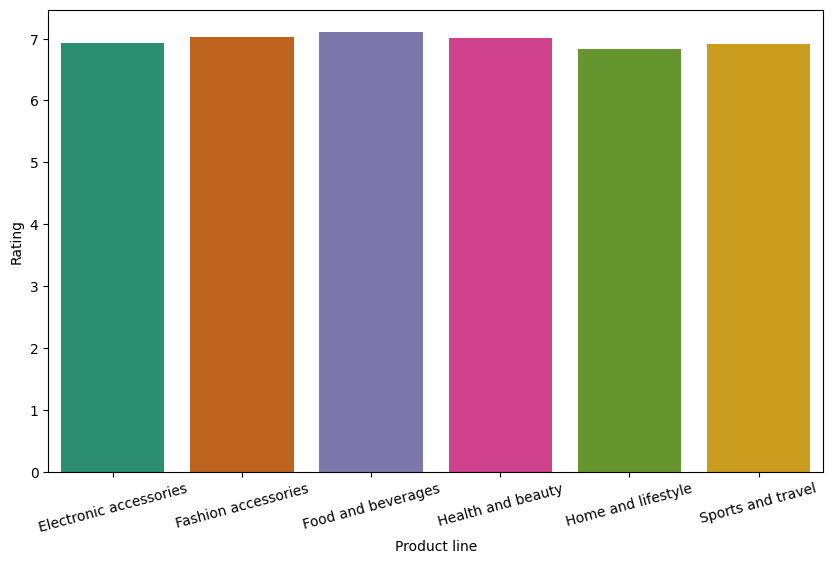

In [64]:
plt.figure(figsize=(10,6))
rating_product = df.groupby('Product line')['Rating'].mean().reset_index()
sns.barplot(data=rating_product, x='Product line', y='Rating', palette='Dark2')
plt.xticks(rotation=15)
plt.show()

In [65]:
product_summary = df.groupby('Product line')['Rating'].mean()

max_product = product_summary.idxmax()
max_value = product_summary.max()

min_product = product_summary.idxmin()
min_value = product_summary.min()

print(f"Produk dengan Rating tertinggi: {max_product} ({max_value:.1f})")
print(f"Produk dengan Rating terendah: {min_product} ({min_value:.1f})")

Produk dengan Rating tertinggi: Food and beverages (7.1)
Produk dengan Rating terendah: Home and lifestyle (6.8)


**Insight:**
> Product line Food and Beverages memiliki tingkat kepuasan pelanggan tertinggi dengan rata-rata rating 7.1, menunjukkan bahwa kualitas produk dan pengalaman pelanggan pada kategori ini dinilai paling baik. Sebaliknya, Home and Lifestyle memiliki tingkat kepuasan terendah dengan rating 6.8, yang mengindikasikan adanya peluang perbaikan, baik dari sisi kualitas produk, variasi, maupun layanan, untuk meningkatkan pengalaman pelanggan pada kategori tersebut.

#### Apakah terdapat hubungan antara jumlah pembelian (Quantity) dan total pendapatan?

In [66]:
df[['Quantity', 'Sales']].corr()

,Quantity,Sales
Quantity,1.00000,0.70551
Sales,0.70551,1.00000


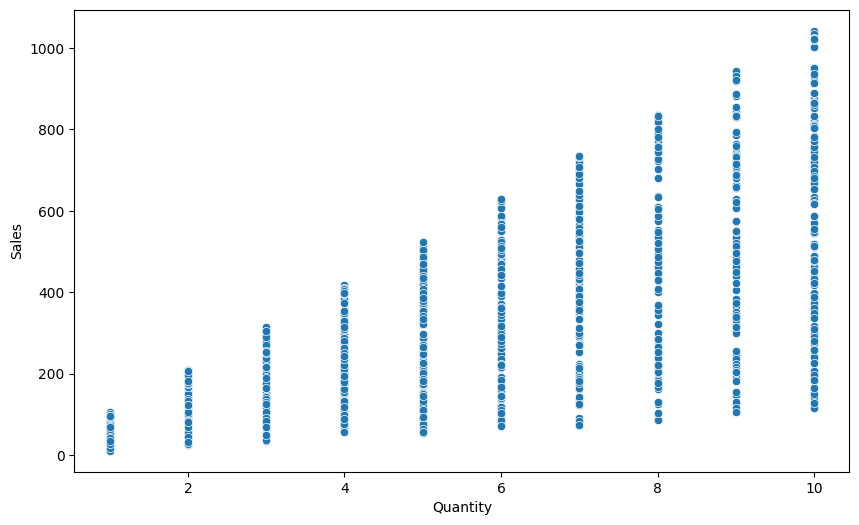

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Quantity', y='Sales')
plt.show()

**Insight:**
> Terdapat hubungan positif yang cukup kuat antara jumlah pembelian (Quantity) dan total pendapatan (Sales), yang ditunjukkan oleh nilai korelasi 0,71. Visualisasi scatterplot memperlihatkan pola kenaikan pendapatan seiring bertambahnya jumlah item yang dibeli. Namun, penyebaran titik yang cukup lebar pada setiap nilai quantity menunjukkan bahwa harga unit produk turut memengaruhi total pendapatan, sehingga transaksi dengan jumlah item yang sama dapat menghasilkan nilai penjualan yang berbeda.

#### Apakah nilai transaksi yang lebih tinggi cenderung menghasilkan rating pelanggan yang lebih baik?

In [68]:
df[['Sales', 'Rating']].describe()

,Sales,Rating
count,1000.000000,1000.00000
mean,322.966749,6.97270
std,245.885335,1.71858
min,10.678500,4.00000
25%,124.422375,5.50000
50%,253.848000,7.00000
75%,471.350250,8.50000
max,1042.650000,10.00000


In [69]:
df[['Sales', 'Rating']].corr()

,Sales,Rating
Sales,1.000000,-0.036442
Rating,-0.036442,1.000000


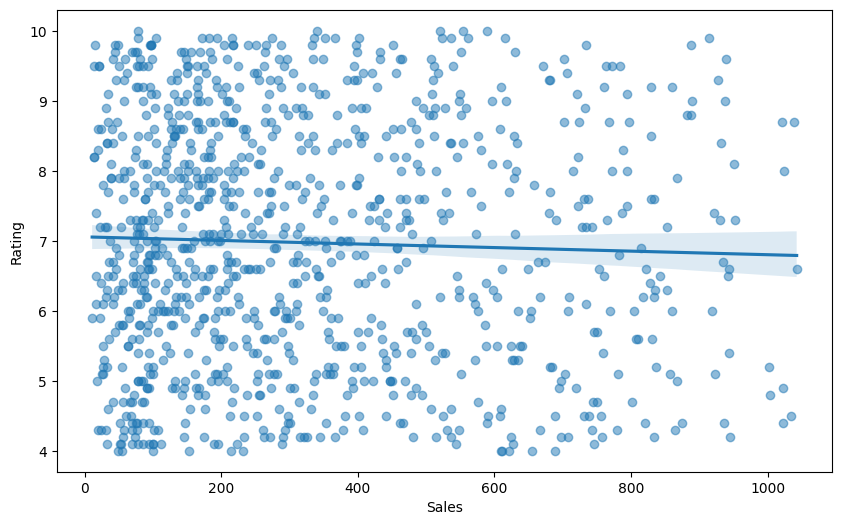

In [70]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Sales', y='Rating', scatter_kws={'alpha':0.5})
plt.show()

**Insight:**
> Berdasarkan hasil scatterplot dan nilai korelasi −0,036, tidak terdapat hubungan yang signifikan antara nilai transaksi (Sales) dan rating pelanggan. Garis tren yang hampir datar menunjukkan bahwa transaksi dengan nilai tinggi tidak cenderung menghasilkan rating yang lebih baik, bahkan hubungannya sangat lemah dan sedikit negatif. Hal ini mengindikasikan bahwa kepuasan pelanggan lebih dipengaruhi oleh faktor non-finansial seperti kualitas produk, pelayanan, dan pengalaman berbelanja, bukan besarnya nilai transaksi.

#### Faktor apa yang paling berpengaruh terhadap Gross Income (harga, kuantitas, atau jenis produk)?

In [71]:
df['Product line'].describe()

count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object

In [72]:
df[['Unit price', 'Quantity', 'gross income']].describe()

,Unit price,Quantity,gross income
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369
std,26.494628,2.923431,11.708825
min,10.080000,1.000000,0.508500
25%,32.875000,3.000000,5.924875
50%,55.230000,5.000000,12.088000
75%,77.935000,8.000000,22.445250
max,99.960000,10.000000,49.650000


In [73]:
df[['Unit price', 'Quantity', 'gross income']].corr()

,Unit price,Quantity,gross income
Unit price,1.000000,0.010778,0.633962
Quantity,0.010778,1.000000,0.705510
gross income,0.633962,0.705510,1.000000


Unit Price

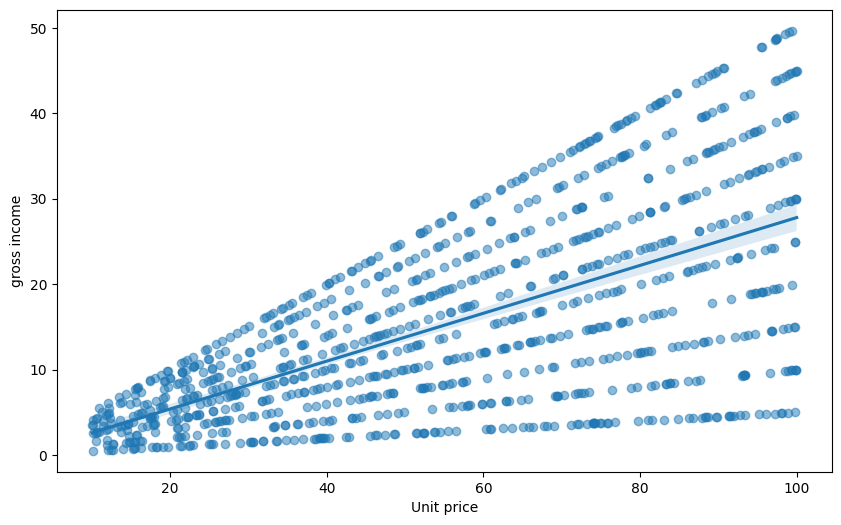

In [76]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Unit price', y='gross income', scatter_kws={'alpha':0.5})
plt.show()

Quantity

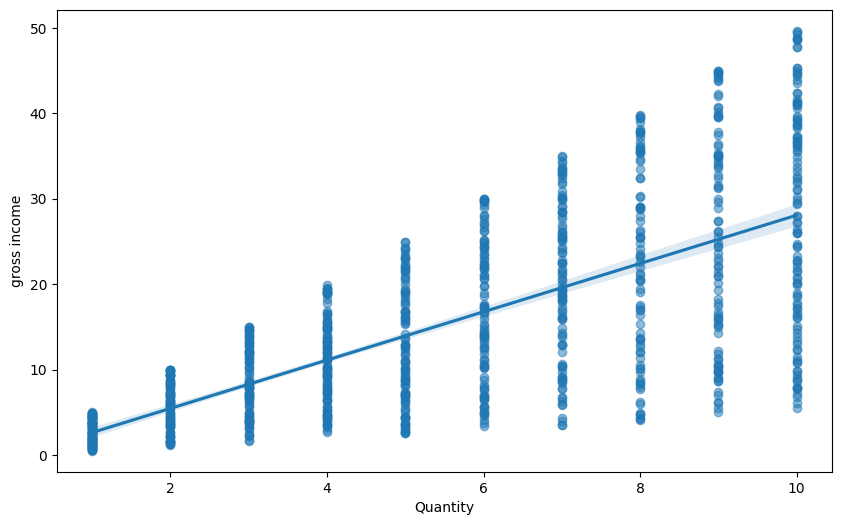

In [77]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Quantity', y='gross income', scatter_kws={'alpha':0.5})
plt.show()

Product line

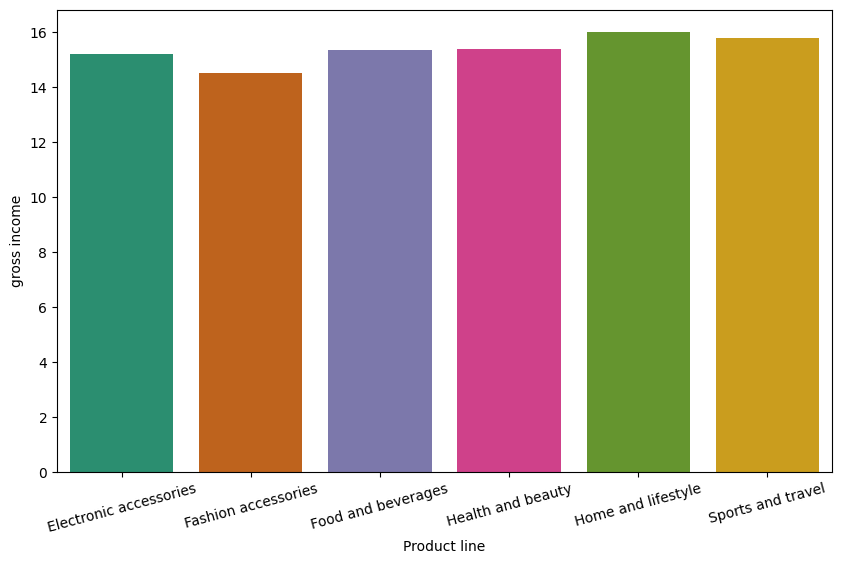

In [79]:
plt.figure(figsize=(10,6))
income_by_product = df.groupby('Product line')['gross income'].mean().reset_index()
sns.barplot(data=income_by_product, x='Product line', y='gross income', palette='Dark2')
plt.xticks(rotation=15)
plt.show()

In [81]:
df.groupby('Product line')['gross income'].mean().reset_index().sort_values(by='gross income')

,Product line,gross income
1,Fashion accessories,14.528062
0,Electronic accessories,15.220597
2,Food and beverages,15.365310
3,Health and beauty,15.411572
5,Sports and travel,15.812630
4,Home and lifestyle,16.030331


**Insight:**
> Berdasarkan analisis korelasi dan visualisasi, Quantity (jumlah pembelian) merupakan faktor yang paling berpengaruh terhadap Gross Income, dengan nilai korelasi tertinggi (0,71). Hal ini menunjukkan bahwa semakin banyak produk yang dibeli, semakin besar keuntungan yang diperoleh. Unit Price (harga satuan) juga berpengaruh cukup kuat terhadap Gross Income (korelasi 0,63), namun tidak sekuat kuantitas. Sementara itu, jenis produk (Product Line) memengaruhi Gross Income pada level agregat, tetapi perbedaannya relatif kecil antar kategori, sehingga pengaruhnya lebih lemah dibandingkan harga dan kuantitas. Dengan demikian, peningkatan volume pembelian menjadi strategi paling efektif untuk meningkatkan Gross Income.